In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

In [30]:
data = loadmat("i140703-001_lfp-spikes.mat")

print(data)

{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Thu Jul 13 23:02:09 2017', '__version__': '1.0', '__globals__': [], 'block': array([[(array([[1]]), array(['motor behavior'], dtype='<U14'), array(['../datasets/i140703-001'], dtype='<U23'), array([[10]]), array([[-1, 81, 83, 85, 88, 90, 92, 93, 96, -1, 79, 80, 84, 86, 87, 89,
                91, 94, 63, 95, 77, 78, 82, 49, 53, 55, 57, 59, 61, 32, 75, 76,
                45, 47, 51, 56, 58, 60, 64, 30, 73, 74, 41, 43, 44, 46, 52, 62,
                31, 28, 71, 72, 39, 40, 42, 50, 54, 21, 29, 26, 69, 70, 37, 38,
                48, 15, 19, 25, 27, 24, 67, 68, 35, 36,  5, 17, 13, 23, 20, 22,
                65, 66, 33, 34,  7,  9, 11, 12, 16, 18, -1,  2,  1,  3,  4,  6,
                 8, 10, 14, -1]]), array(['reach-to-grasp'], dtype='<U14'), array(['electrophysiology'], dtype='<U17'), array(['2008-05-17'], dtype='<U10'), array(['CerePort'], dtype='<U8'), array([[2, 6]]), array(['male'], dtype='<U4'), array([[array([[(a

In [4]:
n_neurons = len(data['block']['segments'][0, 0][0, 0]['spiketrains'][0, 0][0])

In [5]:
data['block']['segments'][0, 0][0, 0]['spiketrains'][0, 0][0, 1]['times'][0, 0][0]

array([2.4170000e+03, 2.6010000e+03, 2.7120000e+03, ..., 3.0092452e+07,
       3.0092908e+07, 3.0093303e+07])

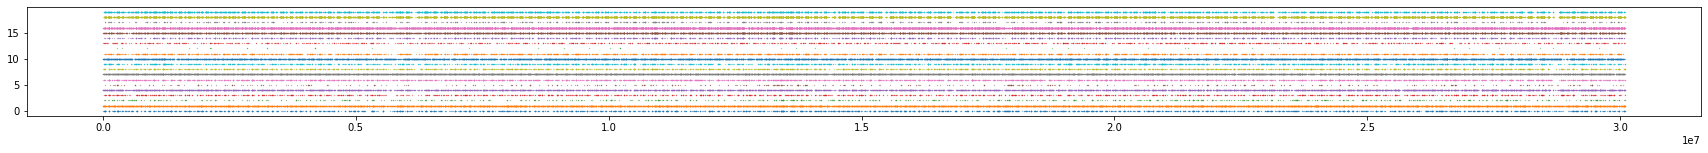

In [53]:
def raster_plot():
    fig, ax = plt.subplots(figsize=(30, 2))
    for i in range(20):
        x_ax = data['block']['segments'][0, 0][0, 0]['spiketrains'][0, 0][0, i]['times'][0, 0][0]
        y_ax = [i] * len(x_ax)
        ax.plot(x_ax, y_ax, 'o', ms=.2)
    # plt.savefig("raster_test.jpg", dpi=400)
    plt.show()

raster_plot()

[-4.39243294e-05  9.14491024e+00]


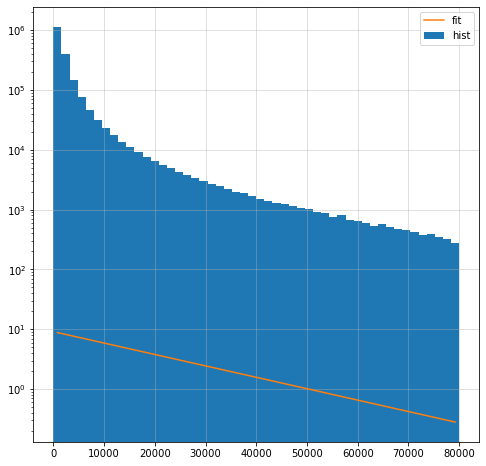

In [78]:
fig, ax = plt.subplots(figsize=(8, 8))
isi = []
for i in range(n_neurons):
    lst = data['block']['segments'][0, 0][0, 0]['spiketrains'][0, 0][0, i]['times'][0, 0][0]
    isi += list(lst[1:] - lst[:-1])

hist, bins = np.histogram(np.array(isi), bins=50, range=(0, 80000), density=False)
ax.hist(np.array(isi), bins=bins, density=False, histtype='bar', log=True, label="hist")


x_axis = (bins[:-1] + bins[1:]) / 2
p_s = np.polyfit(x_axis[20:], np.log(hist[20:]), deg=1)
print(p_s)
rate = p_s[0]

ax.plot(x_axis, p_s[1] * np.exp(p_s[0] * x_axis), label="fit")
plt.legend(loc='best')
plt.grid(alpha=0.5)
plt.show()

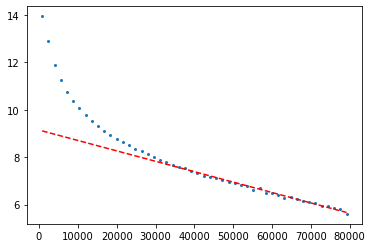

In [74]:
plt.plot(x_axis, np.log(hist), 'o', ms=2)
plt.plot(x_axis, p_s[1] + p_s[0] * x_axis, 'r--')

In [52]:
?np.polyfit

Signature: np.polyfit(x, y, deg, rcond=None, full=False, w=None, cov=False)
Docstring:
Least squares polynomial fit.

.. note::
   This forms part of the old polynomial API. Since version 1.4, the
   new polynomial API defined in `numpy.polynomial` is preferred.
   A summary of the differences can be found in the
   :doc:`transition guide </reference/routines.polynomials>`.

Fit a polynomial ``p(x) = p[0] * x**deg + ... + p[deg]`` of degree `deg`
to points `(x, y)`. Returns a vector of coefficients `p` that minimises
the squared error in the order `deg`, `deg-1`, ... `0`.

The `Polynomial.fit <numpy.polynomial.polynomial.Polynomial.fit>` class
method is recommended for new code as it is more stable numerically. See
the documentation of the method for more information.

Parameters
----------
x : array_like, shape (M,)
    x-coordinates of the M sample points ``(x[i], y[i])``.
y : array_like, shape (M,) or (M, K)
    y-coordinates of the sample points. Several data sets of sample
    poi

In [64]:
?np.log

Call signature:  np.log(*args, **kwargs)
Type:            ufunc
String form:     <ufunc 'log'>
File:            ~/Apps/anaconda3/envs/physics/lib/python3.9/site-packages/numpy/__init__.py
Docstring:      
log(x, /, out=None, *, where=True, casting='same_kind', order='K', dtype=None, subok=True[, signature, extobj])

Natural logarithm, element-wise.

The natural logarithm `log` is the inverse of the exponential function,
so that `log(exp(x)) = x`. The natural logarithm is logarithm in base
`e`.

Parameters
----------
x : array_like
    Input value.
out : ndarray, None, or tuple of ndarray and None, optional
    A location into which the result is stored. If provided, it must have
    a shape that the inputs broadcast to. If not provided or None,
    a freshly-allocated array is returned. A tuple (possible only as a
    keyword argument) must have length equal to the number of outputs.
where : array_like, optional
    This condition is broadcast over the input. At locations where the
   